# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
My invistigation dataset is TMDb movie data. It is a very rich one of data. I think it will be very interesting with endless questions need to have answers from it. From the overview, it shows that it contains information about 10,000 movies. It was collected from The Movie Database (TMDb),including user ratings and revenue. I found 21 columns in it. They were as following: ('id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj') and  I think that i will not use all of them in my investigation. I noticed that 'cast' and 'genres' columns are containig multiple values seperated by '|'.  The final two columns ending with '_adj' shows the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. The importance will be for the following: ('original_title', 'runtime', 'genres', 'release_year', 'vote_average', 'revenue_adj').

### Question(s) for Analysis
#### Question 1: Did movies with higher revenue recived a better rating?
#### Question 2: Did movies with longer run time recieved a higher revenue?
#### Question 3: What is the top 10 movies that recieved the highest revenue?
#### Question 4: What is the top recent 10 movies that recieved the highest revenue?
#### Question 5: What is the number of movies produced over the years?
#### Question 6: Who is the top 10 actors appeared in the movies?

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
# Loading the data and few lines
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Data columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Data dimensions
df.shape

(10866, 21)

## Data Cleaning

### Data Cleaning: Dropping duplication

In [8]:
#Find if there is any duplicated rows
df.duplicated().sum()

1

In [9]:
#Drop out the duplicated rows
df.drop_duplicates(inplace=True)

In [10]:
#Check that duplicated if dropped out
df.duplicated().sum()

0

### Data Cleaning: Dropping Null values

In [11]:
df['revenue_adj'].replace(0,np.NAN,inplace=True)
df['runtime'].replace(0,np.NAN,inplace=True)
df.dropna(axis=0,inplace=True)

### Data Cleaning: Seperating the several values of Genres, and adding them to the dataset.

In [12]:
#Spliting of the several values of Cast column
df_cast=df['cast'].str.split('|',expand=True).rename(columns=lambda x: f'cast_{x+1}')
df_cast.head(1)

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson


In [13]:
#Adding the seperated columns to the dataset
df=df.join([df_cast])

### Data Cleaning: Dropping out the unnessessary columns for my analysis and investigation.

In [14]:
df=df.drop(['id','imdb_id','popularity','budget','revenue','homepage','director','tagline','keywords','overview','genres','production_companies','release_date','vote_count','budget_adj'],axis=1)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Did movies with higher revenue recived a better rating?

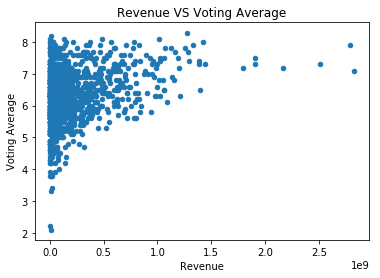

In [15]:
#Drawing a scatter plot decribes the relation between the renvenue and rating of the movie.
df.plot(x='revenue_adj',y='vote_average',kind='scatter')
plt.title('Revenue VS Voting Average')
plt.xlabel('Revenue')
plt.ylabel('Voting Average');

> As it appeared, the is no strong relation between high revenue and the rating. But, I think that I need to dive deeper in the analysis to check the rating above the average of the revenues.

In [16]:
#Check the average of the revenue
df.revenue_adj.mean()

179416483.76170418

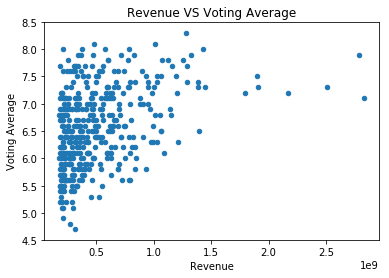

In [17]:
#Drawing a scatter plot shows the relation between the rating of the movies which have revenue above the average of all the revenues
df1=df.loc[:,'vote_average':'revenue_adj']
df_rev=df1[df1['revenue_adj']>=179416483]
df_rev.plot(x='revenue_adj', y='vote_average',kind='scatter')
plt.title('Revenue VS Voting Average')
plt.xlabel('Revenue')
plt.ylabel('Voting Average');

> The result as appeared that there is no relation between the higher revenue and the rating of the movies, it is really surprising!!

### Research Question 2:  Did movies with longer run time recieved a higher revenue?

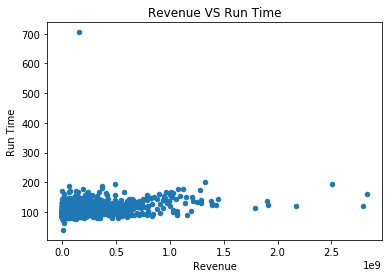

In [18]:
#Drawing a scatter polt shows the relation between the revenue and the run time of the movies
df.plot(x='revenue_adj',y='runtime',kind='scatter')
plt.title('Revenue VS Run Time')
plt.xlabel('Revenue')
plt.ylabel('Run Time');

> The result shows that the longer run time did not recieve a higher revenue.

### Research Question 3: What is the top 10 movies that recieved the highest revenue?

In [19]:
#Detect the top 10 movies based on its revenue
top10rev=df.nlargest(10,'revenue_adj')
top10rev

,original_title,cast,runtime,vote_average,release_year,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162.0,7.1,2009,2.827124e+09,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,121.0,7.9,1977,2.789712e+09,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194.0,7.3,1997,2.506406e+09,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates
10594,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,122.0,7.2,1973,2.167325e+09,Linda Blair,Max von Sydow,Ellen Burstyn,Jason Miller,Lee J. Cobb
9806,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,124.0,7.3,1975,1.907006e+09,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,Murray Hamilton
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.0,7.5,2015,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
8889,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,115.0,7.2,1982,1.791694e+09,Henry Thomas,Drew Barrymore,Robert MacNaughton,Dee Wallace,Peter Coyote
4361,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,143.0,7.3,2012,1.443191e+09,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Scarlett Johansson
7309,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,124.0,8.0,1980,1.424626e+09,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,Anthony Daniels
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,6.5,2015,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson


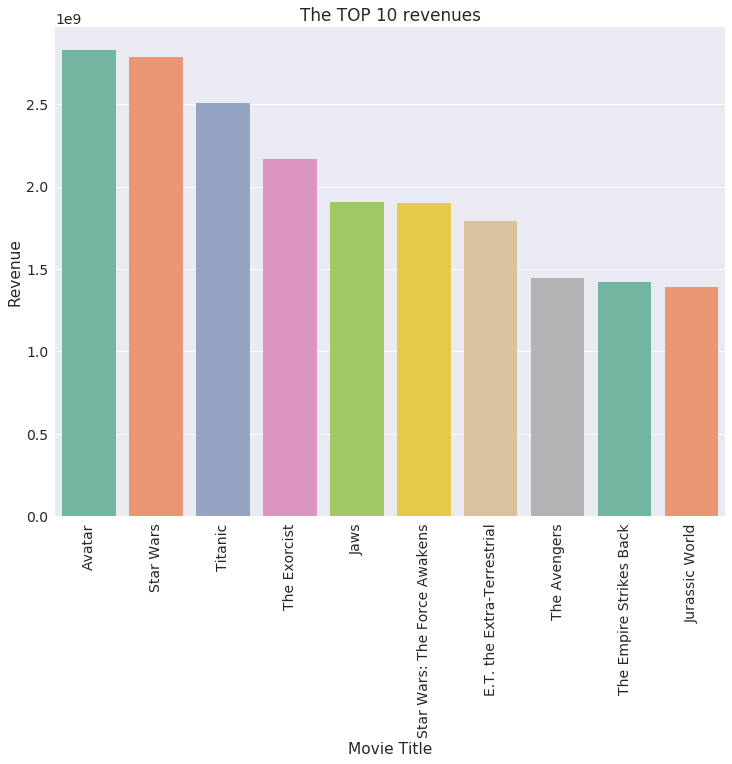

In [20]:
#Detecting the coulmns to compare
xtop10rev=top10rev.original_title
ytop10rev=top10rev.revenue_adj

#Choosing the plot figure and size
sns.set(rc={'figure.figsize':(12,9)},font_scale=1.4)
#Detecting the bar plot axis
top10reve=sns.barplot(xtop10rev,ytop10rev,palette='Set2')
#Rotating the x-axis text
for item in top10reve.get_xticklabels():
    item.set_rotation(90)
#Showing the results on a bar
top10reve.set(xlabel='Movie Title', ylabel='Revenue',title='The TOP 10 revenues')
plt.show()

> The Avatar movie has the highest revenue of all the dataset.

### Research Question 4:  What is the top recent 10 movies that recieved the highest revenue?

In [21]:
#Detect the top recent 10 movies
top10rel15=df.nlargest(10,'release_year')
#Rearrange them based on the highest revenue
top10rev15=top10rel15.nlargest(10,'revenue_adj')
top10rev15

,original_title,cast,runtime,vote_average,release_year,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.0,7.5,2015,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,6.5,2015,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137.0,7.3,2015,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91.0,6.5,2015,1.064192e+09,Sandra Bullock,Jon Hamm,Michael Keaton,Allison Janney,Steve Coogan
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,94.0,8.0,2015,7.854116e+08,Amy Poehler,Phyllis Smith,Richard Kind,Bill Hader,Lewis Black
7,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141.0,7.6,2015,5.477497e+08,Matt Damon,Jessica Chastain,Kristen Wiig,Jeff Daniels,Michael PeÃ±a
5,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156.0,7.2,2015,4.903142e+08,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,Paul Anderson
6,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125.0,5.8,2015,4.053551e+08,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,J.K. Simmons
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.0,7.1,2015,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119.0,6.3,2015,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller


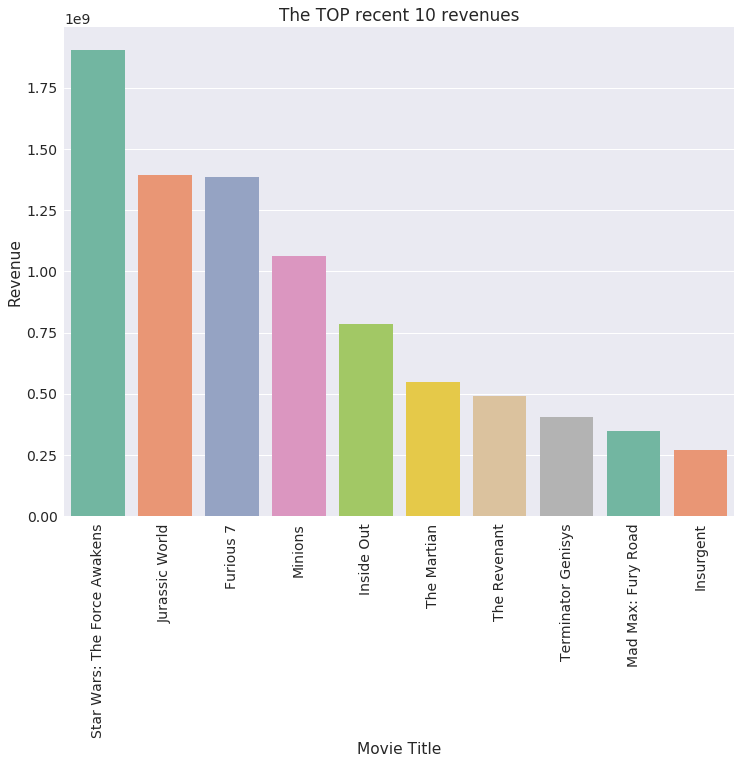

In [47]:
#Detecting the coulmns to compare
xtop10rev15=top10rev15.original_title
ytop10rev15=top10rev15.revenue_adj

#Choosing the plot figure and size
sns.set(rc={'figure.figsize':(12,9)},font_scale=1.4)
#Detecting the bar plot axis
top10reve15=sns.barplot(xtop10rev15,ytop10rev15,palette='Set2')
#Rotating the x-axis text
for item in top10reve15.get_xticklabels():
    item.set_rotation(90)
#Showing the results on a bar
top10reve15.set(xlabel='Movie Title', ylabel='Revenue',title='The TOP recent 10 revenues')
plt.show()

> The Star Wars movie was the highest revenue from the most recent movies.

### Research Question 5:  What is the number of movies produced over the years?

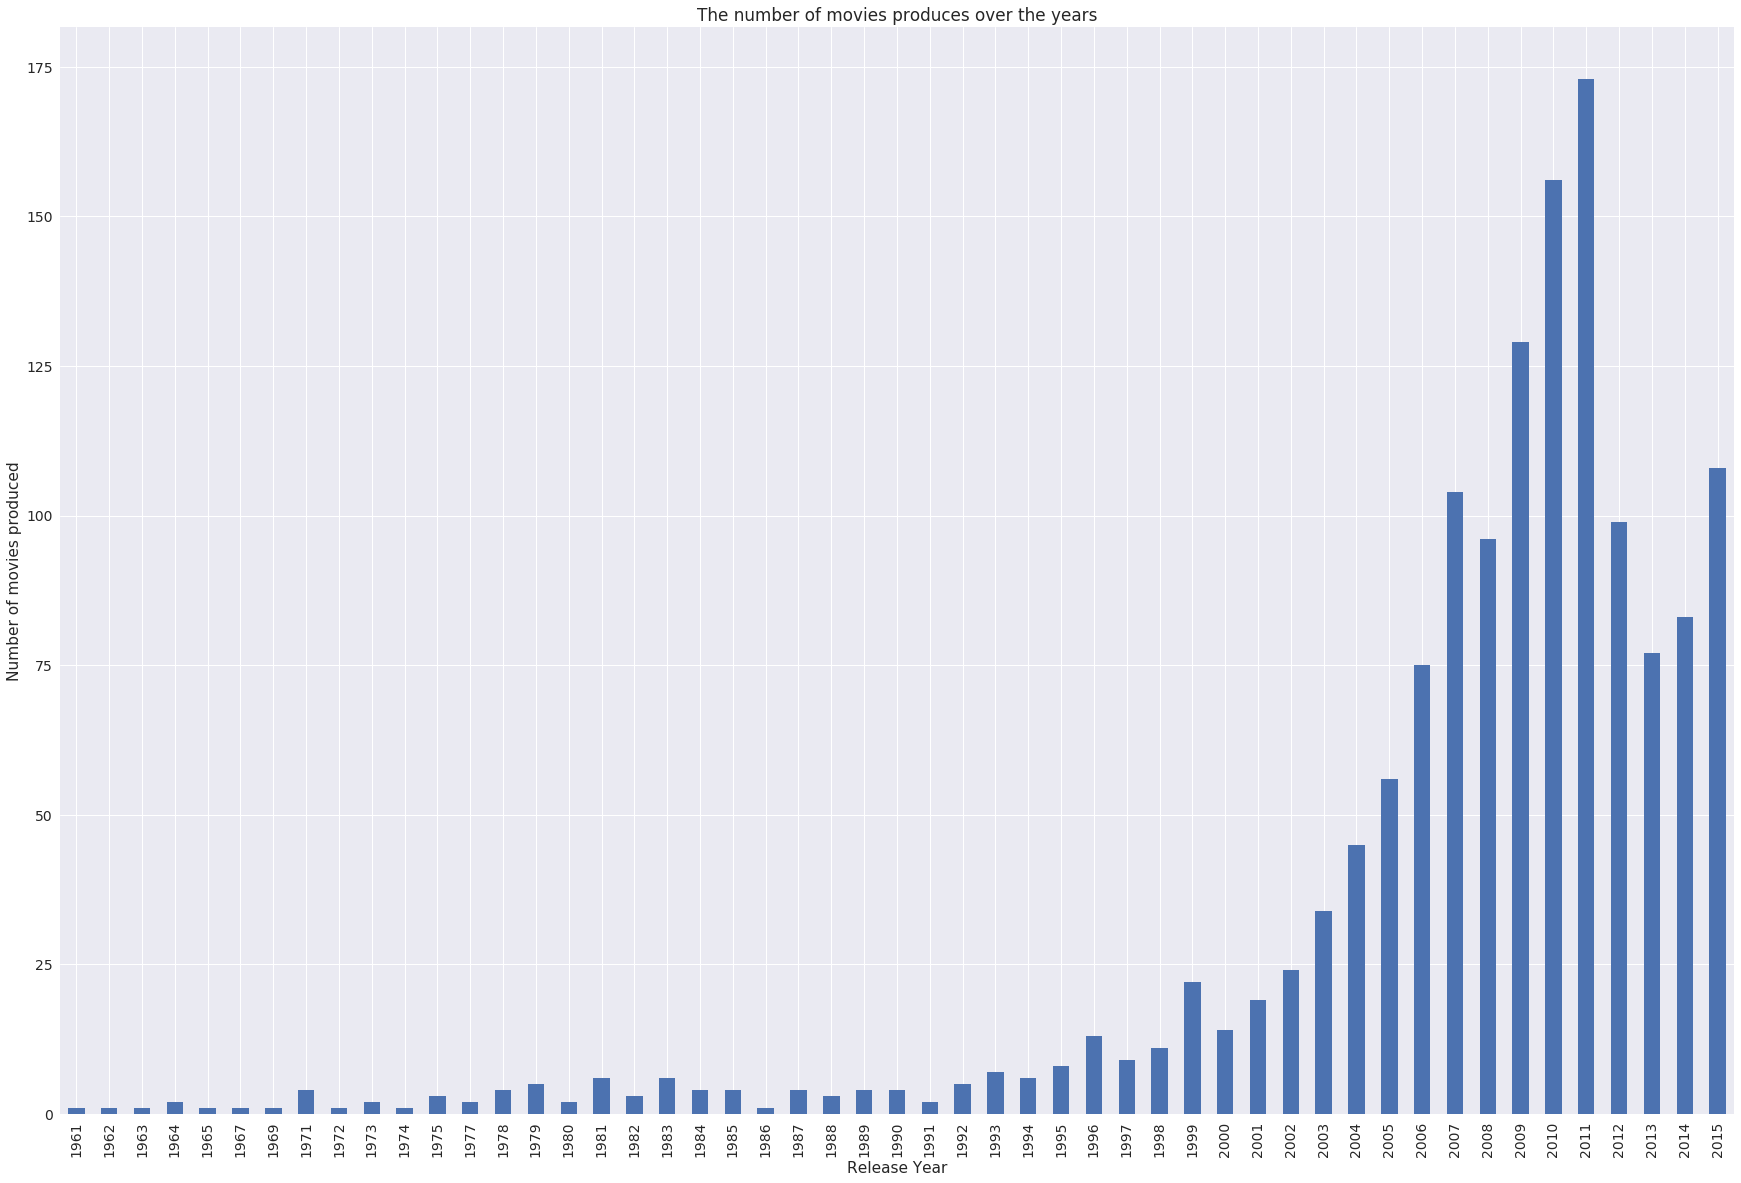

In [22]:
#Detecting the coulmns to compare
year=df.release_year.value_counts().sort_index()
year_count=df.release_year.value_counts(ascending=True)

#Drawing a bar plot show the number of movies produced over the years
year.plot(x=year,y=year_count,kind='bar',figsize=(30,20))
plt.title('The number of movies produces over the years')
plt.xlabel('Release Year')
plt.ylabel('Number of movies produced');

> 2011 was the the highest year that records around 174 movie produced.
> It was surprising that the production of movies was dropped to 125 in 2015.

### Research Question 6:  Who is the top 10 actors appeared in the movies?

In [23]:
#Combining the cast columns after its seperation
df_cast_all=df_cast.melt(var_name='Cast Number', value_name='Cast Name').value_counts('Cast Name')
#Detecting the top 10 actors appeared
df_cast_top10=df_cast_all.nlargest(10)

#Choosing the plot figure and size
sns.set(rc={'figure.figsize':(12,9)},font_scale=1.4)
#Detecting the bar plot axis
top10actor=sns.barplot(df_cast_top10.index,df_cast_top10,palette='Set2')
#Rotating the x-axis text
for item in top10actor.get_xticklabels():
    item.set_rotation(90)
#Showing the results on a bar
top10actor.set(xlabel='Actor Name', ylabel='Counts',title='The TOP 10 actors appeared in the movies')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

> The top 10 actors appears in the movies are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, Michael Caine, Robin Williams, John Cusack, Morgan Freeman, John Goodman and Susan Sarandon.

<a id='conclusions'></a>
## Conclusions

Finally, as I mentioned before that this dataset is rich with data. Fursure, I did not cover all of them and also I didn't go for any statistical tests. For my questions, I found the following:
> 1. There is no relation between the higher revenue and the rating of the movies, it is really surprising!!

> 2. The longer run time did not recieve a higher revenue.

> 3. The Avatar movie has the highest revenue of all the dataset.

> 4. 2011 was the the highest year that records around 174 movie produced.

> 5. Robert De Niro is the most appearing actor in the movies.

## Limitations
While there is missing values in the dataset, I do not think that it affects the results. There is columns that contains multiple values as cast and genres, but also I split what needed.

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0